<a href="https://colab.research.google.com/github/sidhu2690/GEANT4/blob/main/03_HGCAL_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def process_cellwise(input_file, output_file='processed_hits.csv'):
    df = pd.read_csv(input_file, sep=r'\s+')

    df_filtered = df[(df['Layer'] > 0) & (df['Edep_MeV'] > 0)].copy()

    cellSize = 7 # 7mm

    df_filtered['i'] = np.round(df_filtered['X_mm'] / cellSize).astype(int)
    df_filtered['j'] = np.round(df_filtered['Y_mm'] / cellSize).astype(int)
    df_filtered['xi'] = df_filtered['i'] * cellSize
    df_filtered['yi'] = df_filtered['j'] * cellSize
    df_filtered['zi'] = df_filtered['Z_mm']

    processed_hits = []

    grouped = df_filtered.groupby(['EventID', 'Layer', 'i', 'j'])

    for (event_id, layer, i, j), group in grouped:
        total_edep = group['Edep_MeV'].sum()

        xi = group['xi'].iloc[0]
        yi = group['yi'].iloc[0]
        zi = group['zi'].iloc[0]

        ri = np.sqrt(xi**2 + yi**2 + zi**2)
        phi_rad = np.arctan2(yi, xi)
        phi_deg = np.degrees(phi_rad)
        theta_rad = np.arccos(zi / ri) if ri > 0 else 0
        theta_deg = np.degrees(theta_rad)
        eta = -np.log(np.tan(theta_rad / 2.0)) if 0 < theta_rad < np.pi else 0.0

        processed_hits.append({
            'event_id': int(event_id),
            'layer': int(layer),
            'i': int(i),
            'j': int(j),
            'xi': round(xi, 3),
            'yi': round(yi, 3),
            'zi': round(zi, 3),
            'theta': round(theta_deg, 2),
            'phi': round(phi_deg, 2),
            'eta': round(eta, 2),
            'edep': round(total_edep, 6)
        })

    df_output = pd.DataFrame(processed_hits)
    df_output.to_csv(output_file, index=False)

    print(f"Number of Entries: {len(df_output)}")
    print(f"\n{df_output.head(10)}")

    return df_output

In [10]:
df_output = process_cellwise("/content/particle_tracking.txt")

Number of Entries: 134571

   event_id  layer    i   j    xi   yi      zi  theta     phi   eta      edep
0         1      1 -208 -34 -1456 -238  3221.4  24.61 -170.72  1.52  0.098316
1         1      1 -207  52 -1449  364  3221.4  24.88  165.90  1.51  0.083040
2         1      1 -205 -13 -1435  -91  3221.4  24.05 -176.37  1.55  0.095366
3         1      1 -204  -2 -1428  -14  3221.4  23.91 -179.44  1.55  0.099328
4         1      1 -202 -43 -1414 -301  3221.4  24.17 -167.98  1.54  0.139945
5         1      1 -198 -24 -1386 -168  3221.4  23.43 -173.09  1.57  0.106441
6         1      1 -196  41 -1372  287  3221.4  23.51  168.19  1.57  0.247402
7         1      1 -189 -45 -1323 -315  3221.4  22.89 -166.61  1.60  0.098802
8         1      1 -189  78 -1323  546  3221.4  23.96  157.57  1.55  0.090706
9         1      1 -188  85 -1316  595  3221.4  24.15  155.67  1.54  0.161358


In [11]:
df_output.head()

,event_id,layer,i,j,xi,yi,zi,theta,phi,eta,edep
0,1,1,-208,-34,-1456,-238,3221.4,24.61,-170.72,1.52,0.098316
1,1,1,-207,52,-1449,364,3221.4,24.88,165.90,1.51,0.083040
2,1,1,-205,-13,-1435,-91,3221.4,24.05,-176.37,1.55,0.095366
3,1,1,-204,-2,-1428,-14,3221.4,23.91,-179.44,1.55,0.099328
4,1,1,-202,-43,-1414,-301,3221.4,24.17,-167.98,1.54,0.139945


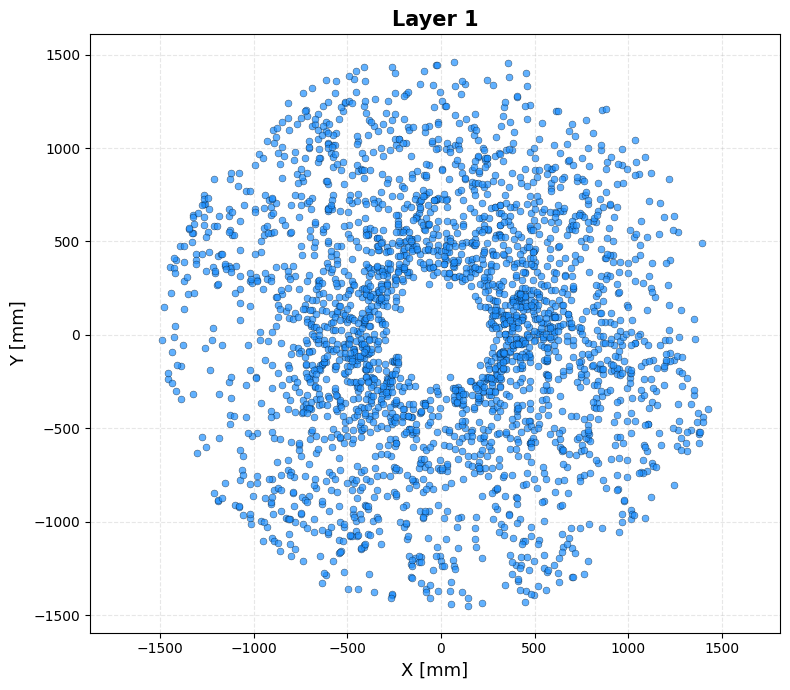

In [13]:
layer_df = df_output[df_output['layer'] == 1]

plt.figure(figsize=(8, 7))
plt.scatter(
    layer_df['xi'], layer_df['yi'],
    s=25, c='dodgerblue', alpha=0.7, edgecolor='k', linewidth=0.3
)

plt.xlabel('X [mm]', fontsize=13)
plt.ylabel('Y [mm]', fontsize=13)
plt.title('Layer 1', fontsize=15, weight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.axis('equal')
plt.tight_layout()
plt.show()

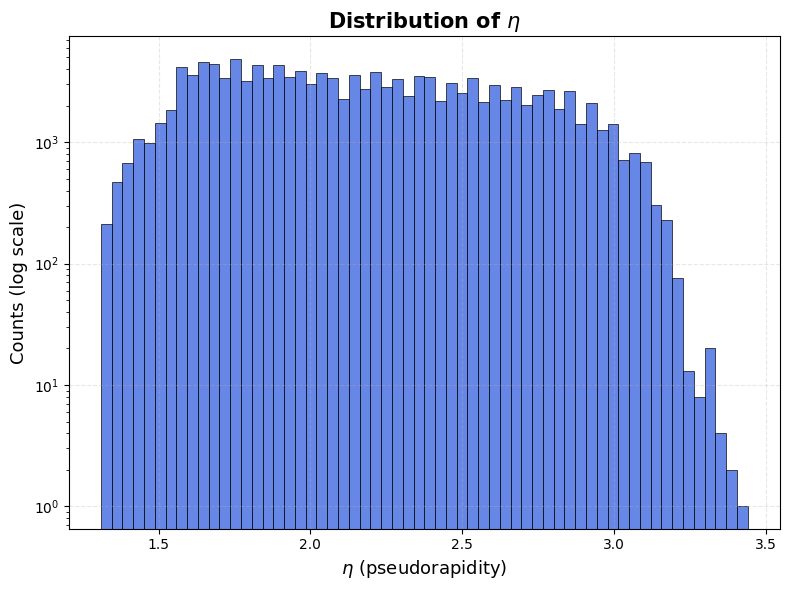

In [14]:
plt.figure(figsize=(8, 6))

plt.hist(df_output['eta'], bins=60, color='royalblue', alpha=0.8, edgecolor='black', linewidth=0.6)

plt.yscale('log')
plt.xlabel(r'$\eta$ (pseudorapidity)', fontsize=13)
plt.ylabel('Counts (log scale)', fontsize=13)
plt.title(r'Distribution of $\eta$', fontsize=15, weight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

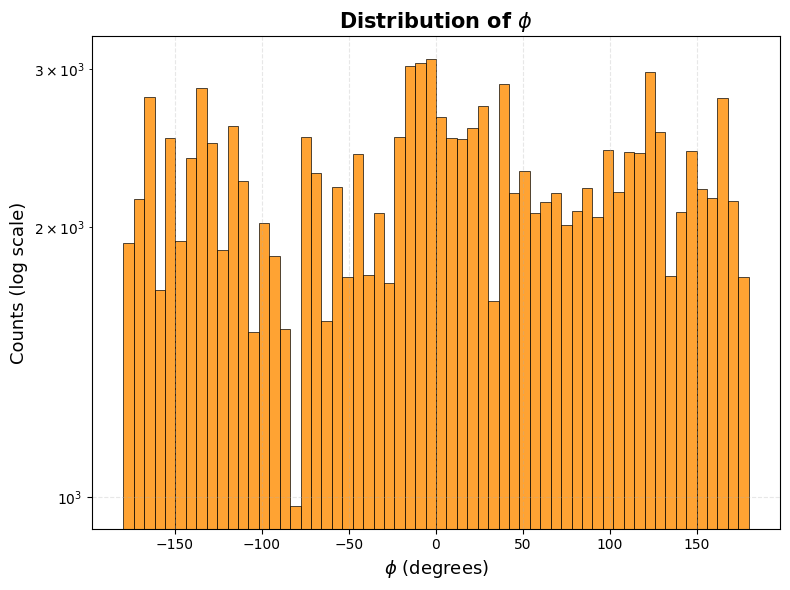

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df_output['phi'], bins=60, color='darkorange', alpha=0.8, edgecolor='black', linewidth=0.6)
plt.yscale('log')
plt.xlabel(r'$\phi$ (degrees)', fontsize=13)
plt.ylabel('Counts (log scale)', fontsize=13)
plt.title(r'Distribution of $\phi$', fontsize=15, weight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

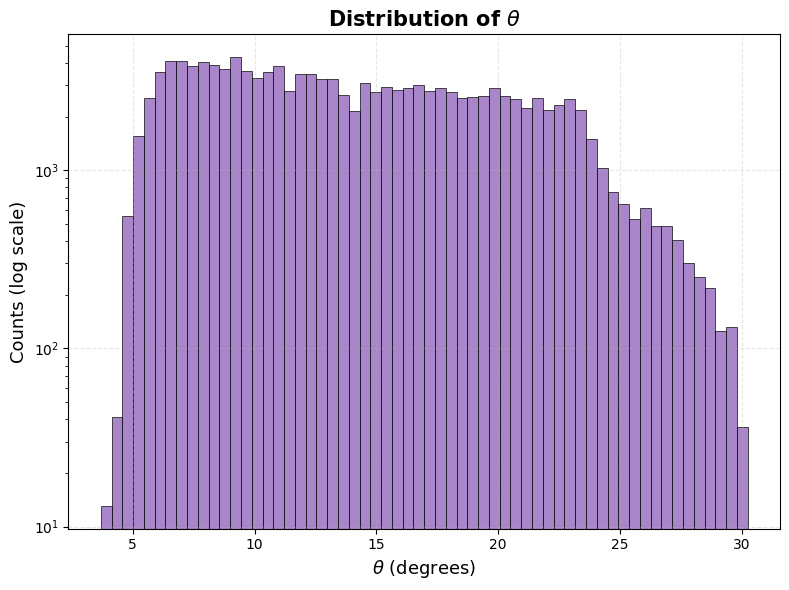

In [16]:
plt.figure(figsize=(8, 6))

plt.hist(df_output['theta'], bins=60, color='tab:purple', alpha=0.8, edgecolor='black', linewidth=0.6)

plt.yscale('log')
plt.xlabel(r'$\theta$ (degrees)', fontsize=13)
plt.ylabel('Counts (log scale)', fontsize=13)
plt.title(r'Distribution of $\theta$', fontsize=15, weight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

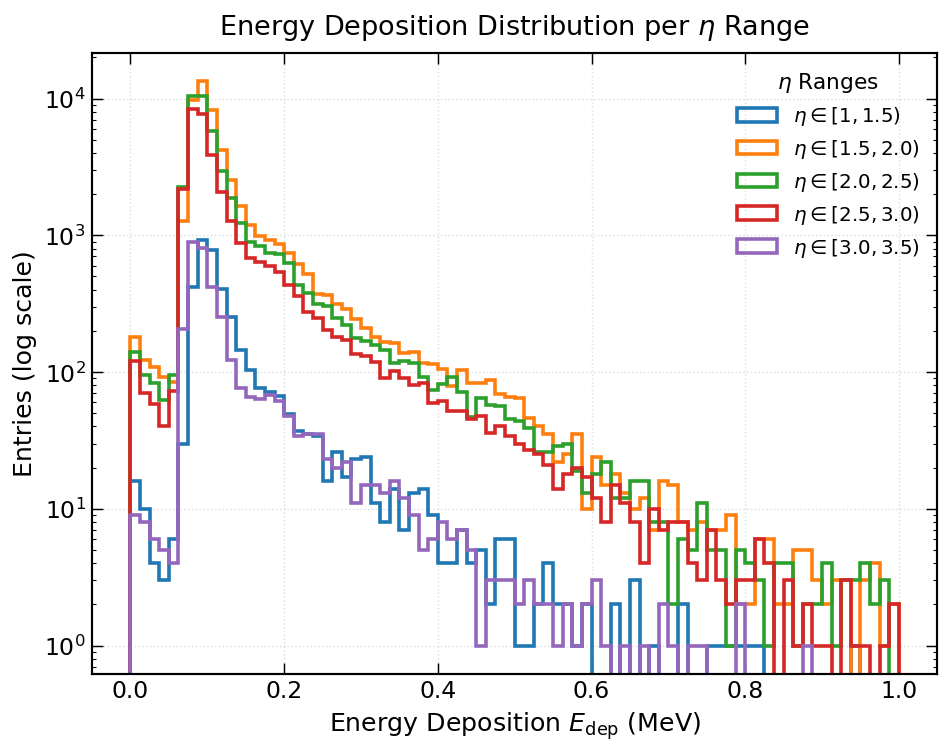

In [17]:
import matplotlib as mpl

mpl.rcParams.update({
    "font.size": 13,
    "axes.linewidth": 1.2,
    "axes.labelsize": 14,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "legend.frameon": False,
    "figure.dpi": 130
})

eta_bins = [(1, 1.5), (1.5, 2.0), (2.0, 2.5), (2.5, 3.0), (3.0, 3.5)]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

plt.figure(figsize=(7.5, 6))

for (low, high), color in zip(eta_bins, colors):
    df_eta = df_output[(df_output['eta'] >= low) & (df_output['eta'] < high)]
    if not df_eta.empty:
        plt.hist(
            df_eta['edep'], bins=80, range=(0, 1),  # plot up to 1 MeV
            histtype='step', linewidth=2.0, color=color,
            label=fr"$\eta \in [{low}, {high})$"
        )

plt.yscale('log')
plt.xlabel(r'Energy Deposition $E_{\mathrm{dep}}$ (MeV)')
plt.ylabel('Entries (log scale)')
plt.title(r'Energy Deposition Distribution per $\eta$ Range', fontsize=15, pad=10)
plt.grid(alpha=0.4, linestyle=':')
plt.legend(fontsize=11, loc='upper right', title=r'$\eta$ Ranges', title_fontsize=12)

plt.tight_layout()
plt.show()
